In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('한국경기정보_final.csv', low_memory=False)
df['rcDate']

0        2019-01-05
1        2019-01-05
2        2019-01-05
3        2019-01-05
4        2019-01-05
            ...    
55000    2024-04-28
55001    2024-04-28
55002    2024-04-28
55003    2024-04-28
55004    2024-04-28
Name: rcDate, Length: 55005, dtype: object

In [34]:
df = pd.read_csv('한국경기정보_final.csv', low_memory=False)
df = df.drop(columns = ["Unnamed: 0"])
df[df.columns] = df[df.columns].astype(str)
df['wgDf']= df['wgDf'].fillna(0)
df = df.drop(columns = ['rankRise','meet','ordBigo','index', 'ilsu','rcDay'])
columns_to_convert = ['humidity', 'buga1', 'buga2', 'buga3', 'chaksun1', 'chaksun2', 'chaksun3', 'chaksun4', 'chaksun5',
                     'rcTime', 'seG1fAccTime', 'seG3fAccTime', 'seS1fAccTime', 'se_1cAccTime', 'se_2cAccTime', 
                     'se_3cAccTime', 'se_4cAccTime', 'sjG1fOrd', 'sjG3fOrd', 'sjS1fOrd', 'sj_1cOrd', 'sj_2cOrd', 
                     'sj_3cOrd', 'sj_4cOrd', 'age', 'winOdds', 'ord', 'wgHr', 'wgDf', 'chulNo', 'hrNo', 'plcOdds', 
                     'rating', 'wgBudam', 'wgJk']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df_dtypes = df.dtypes.to_dict()


In [35]:
#Convert dates to datetime
df['rcDate'] = pd.to_datetime(df['rcDate'])
df = df.sort_values(["rcDate", "rcNo"])
print(min(df['rcDate']))
print(max(df['rcDate']))

2019-01-05 00:00:00
2024-04-28 00:00:00


# Data Modification

## diffUnit: 
Converted from 착차 데이터 string ⇒ float through approximating distance

In [36]:
df['diffUnit'] = df['diffUnit'].astype(str)
replacements = {
    '목': 0.32,
    '머리': 0.13,
    '코': 0.05,
    '동순위': 0.0,
    '착변': -0.25,
    '1¼': 1.25,
    '1¼+1': 2.25,
    '1½': 1.5,
    '1¾': 1.75,
    '¾': 0.75,
    '2+½': 2.5,
    '2½+1':3.5,
    '1+½':1.5,
    '2+½': 2.5,
    '2+½': 2.5,
    '½': 0.5,
    '1+½': 1.5,
    '-': 0,
}
df['diffUnit'] = df['diffUnit'].replace(replacements, regex=True)


## prizeCond

Since Rating is written in structure of "R0/1 ~ R(N)" 
- Two column created
 1. noob: Whether rating of 0 can participate or not
 2. maxRt: ceiling rating to participate+

In [37]:
df['prizeCond'].unique()

array(['R0~0', 'R1~50', 'R1~80', 'R1~65', 'R1~35', 'R1~140', 'R1~115',
       'R1~110', 'R1~120', 'R1~100', 'R0~140', 'R1~95', 'R1~105', 'R0~80',
       'R0~90', 'R0~65', 'R0~50', 'R1~90'], dtype=object)

In [38]:
df['prizeCond'] = df['prizeCond'].astype(str)
print(df[(df['rating']==0.0)]['prizeCond'].unique())
print(df[(df['prizeCond']=='R0~140') & (df['rating']==0.0)]['rcName'].unique())
print(df[(df['rating']==0.0)]['rank'].unique())

['R0~0' 'R0~140']
['육성심사합격 조기출전마 특별(특)' '코리아 스프린트(GⅠ)' '코리아컵(GⅠ)' '문화일보배(L)'
 'Rookie Stakes@서울' '제주특별자치도지사후원특별@서울' '농협중앙회장배(L)' '스포츠서울배(L)'
 '코리아 스프린트(G1)' '코리아컵(G1)']
['국6등급' '국OPEN' '혼OPEN']


In [39]:
df[['prefix', 'maxRt']] = df['prizeCond'].str.split('~', expand=True)
df['noob'] = df['prefix'].apply(lambda x: 1 if x == 'R0' else 0)
df['maxRt'] = df['maxRt'].astype(int)

# Drop the 'prizeCond' and 'prefix' columns
df = df.drop(columns=['prizeCond', 'prefix'])
df[['noob','maxRt']]

,noob,maxRt
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
55000,0,50
55001,0,50
55002,0,50
55003,0,50


## 

## sex
Columns created
- sexNo
- sexMale
- sexFemale

There are cases when female horses are spayed too. 

In [40]:
df['sex'].unique()

array(['암', '수', '거'], dtype=object)

In [41]:
# One-hot encode the 'sex' column and concatenate with the original DataFrame
df = pd.concat([df, pd.get_dummies(df['sex'], prefix='sex')], axis=1)

# Drop the original 'sex' column if you no longer need it
df.drop(columns=['sex'], inplace=True)
df.rename(columns={'sex_거': 'sexNo', 'sex_수': 'sexMale', 'sex_암': 'sexFemale'}, inplace=True)
df.columns

Index(['birthday', 'ageCond', 'age', 'winOdds', 'sj_3cOrd', 'ord', 'wgHr',
       'track', 'wgDf', 'humidity', 'budam', 'buga1', 'buga2', 'buga3',
       'chaksun1', 'chaksun2', 'chaksun3', 'chaksun4', 'chaksun5', 'chulNo',
       'diffUnit', 'hrName', 'hrNo', 'hrTool', 'jkName', 'jkNo', 'name',
       'owName', 'owNo', 'plcOdds', 'rank', 'rating', 'rcDate', 'rcDist',
       'rcName', 'rcNo', 'rcTime', 'seG1fAccTime', 'seG3fAccTime',
       'seS1fAccTime', 'se_1cAccTime', 'se_2cAccTime', 'se_3cAccTime',
       'se_4cAccTime', 'sjG1fOrd', 'sjG3fOrd', 'sjS1fOrd', 'sj_1cOrd',
       'sj_2cOrd', 'sj_4cOrd', 'trName', 'trNo', 'weather', 'wgBudam',
       'wgBudamBigo', 'wgJk', 'maxRt', 'noob', 'sexNo', 'sexMale',
       'sexFemale'],
      dtype='object')

## hrTool [미완][현재는 빼는걸로 함]

[장구이름,장구이름] 형식으로 해둠
하지만 encoding으로 할려다가 그러면 나중에 너무 길어지지 않을까?(one hot encoding하려는거에 대해 의문이 있다 )

In [42]:
df['hrTool'].unique()


array(['망사눈', '승인재갈', '-', ..., '양털코+,눈가면-,반가지큰-', '계란형큰+,망사눈-,반가지큰-',
       '계란형큰+,망사,자극판-'], dtype=object)

In [43]:

df['hrTool'] = df['hrTool'].astype(str)

# Define a regular expression to match the pattern ",(some string)-"
pattern = r',[^,]+-'
pattern2 = r'[^,]+-'

# Apply the regular expression to remove the matching substrings
df['hrTool'] = df['hrTool'].str.replace(pattern, '', regex=True)
df['hrTool'] = df['hrTool'].str.replace(pattern2, '', regex=True)
df['hrTool'] = df['hrTool'].str.replace('+','')
df['hrTool'] = df['hrTool'].str.replace('-','')
df['hrTool'] = df['hrTool'].str.replace(r'\s+','',regex=True)

#hrTool spliting 
df_split =df['hrTool'].str.split(',')



In [44]:
df[['hrTool']]

,hrTool
0,망사눈
1,망사눈
2,승인재갈
3,
4,망사
...,...
55000,
55001,망사
55002,"망사,반가지큰"
55003,"계란형큰,망사눈"


In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

# Perform one-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_encoded = pd.DataFrame(mlb.fit_transform(df['hrTool']), columns=mlb.classes_, index=df.index)

# Concatenate the original DataFrame with the one-hot encoded columns
df_final = pd.concat([df, df_encoded], axis=1).drop('hrTool', axis=1)
print("Final DataFrame after one-hot encoding:")
df_final

Final DataFrame after one-hot encoding:


,birthday,ageCond,age,winOdds,sj_3cOrd,ord,wgHr,track,wgDf,humidity,...,정,지,컬,코,큰,털,판,편,혀,형
0,20150308,연령오픈,4,10.7,8,1,472,건조,-12.0,2,...,0,0,0,0,0,0,0,0,0,0
1,20160326,연령오픈,3,2.8,2,2,457,건조,3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,20160520,연령오픈,3,3.4,6,3,462,건조,-1.0,2,...,0,0,0,0,0,0,0,0,0,0
3,20150314,연령오픈,4,22.0,3,4,477,건조,-10.0,2,...,0,0,0,0,0,0,0,0,0,0
4,20160412,연령오픈,3,94.8,10,5,469,건조,20.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55000,20210210,연령오픈,3,5.2,6,4,455,양호,NaN,9,...,0,0,0,0,0,0,0,0,0,0
55001,20170327,연령오픈,7,30.6,7,5,455,양호,4.0,9,...,0,0,0,0,0,0,0,0,0,0
55002,20180406,연령오픈,6,22.5,8,6,468,양호,8.0,9,...,0,1,0,0,1,0,0,0,0,0
55003,20190417,연령오픈,5,30.0,3,7,500,양호,-2.0,9,...,0,0,0,0,1,0,0,0,0,1


## Track

Changed to numerical values(more details in data exploration page of notion)

In [46]:
df['track'] = df['track'].astype(str)
# Define the mapping dictionary
mapping = {
    '건조': 1,
    '불량': 5,
    '양호': 2,
    '다습': 3,
    '포화': 4
}

df['track'] = df['track'].map(mapping)
df['track'].unique()

array([1, 5, 2, 3, 4])

## Rank

- Splitted into two columns
    - rankOrigin : 혼/국
    - rank : 등급 + OPEN

In [47]:
import numpy as np

df['rank'] = df['rank'].astype(str) 

# Function to extract and map 국/혼
def extract_category(value):
    if value.startswith('국'):
        return 0
    else:
        return 1

# Function to extract grade or set to NaN for OPEN
def extract_grade(value):
    if 'OPEN' in value:
        return np.nan
    else:
        # Remove any non-numeric characters and convert to integer
        return int(''.join(filter(str.isdigit, value)))

# Apply the functions to create new columns
df['rankOrigin'] = df['rank'].apply(extract_category)
df['rank'] = df['rank'].apply(extract_grade)

print("DataFrame after processing:")
df['rank']

DataFrame after processing:


0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
55000    4.0
55001    4.0
55002    4.0
55003    4.0
55004    4.0
Name: rank, Length: 55005, dtype: float64

In [63]:
df['track']

0        1
1        1
2        1
3        1
4        1
        ..
55000    2
55001    2
55002    2
55003    2
55004    2
Name: track, Length: 53235, dtype: int64

In [48]:
df = df.drop(columns=['hrTool'])
df.to_csv("시험용.csv", index=False)


# Split Train / Validation

Split based on datetime.

In [49]:
train_df = df[df['rcDate'] < pd.to_datetime("2023-01-01")]
valid_df = df[df['rcDate'] >= pd.to_datetime("2023-01-01")]

train_df.to_csv("race_train_2023_01_01.csv", index=False)
valid_df.to_csv("race_valid_2023_01_01.csv", index=False)

In [50]:
train_df = pd.read_csv('race_train_2023_01_01.csv', dtype=df_dtypes)
valid_df = pd.read_csv('race_valid_2023_01_01.csv', dtype=df_dtypes)

In [51]:
train_df.columns

Index(['birthday', 'ageCond', 'age', 'winOdds', 'sj_3cOrd', 'ord', 'wgHr',
       'track', 'wgDf', 'humidity', 'budam', 'buga1', 'buga2', 'buga3',
       'chaksun1', 'chaksun2', 'chaksun3', 'chaksun4', 'chaksun5', 'chulNo',
       'diffUnit', 'hrName', 'hrNo', 'jkName', 'jkNo', 'name', 'owName',
       'owNo', 'plcOdds', 'rank', 'rating', 'rcDate', 'rcDist', 'rcName',
       'rcNo', 'rcTime', 'seG1fAccTime', 'seG3fAccTime', 'seS1fAccTime',
       'se_1cAccTime', 'se_2cAccTime', 'se_3cAccTime', 'se_4cAccTime',
       'sjG1fOrd', 'sjG3fOrd', 'sjS1fOrd', 'sj_1cOrd', 'sj_2cOrd', 'sj_4cOrd',
       'trName', 'trNo', 'weather', 'wgBudam', 'wgBudamBigo', 'wgJk', 'maxRt',
       'noob', 'sexNo', 'sexMale', 'sexFemale', 'rankOrigin'],
      dtype='object')

In [52]:
#Imports

import matplotlib.pyplot as plt

In [53]:
print("train_df is nan num: ", train_df.isna().sum().sum())
print("valid_df is nan num: ", valid_df.isna().sum().sum())

train_df is nan num:  3604
valid_df is nan num:  1422


int64


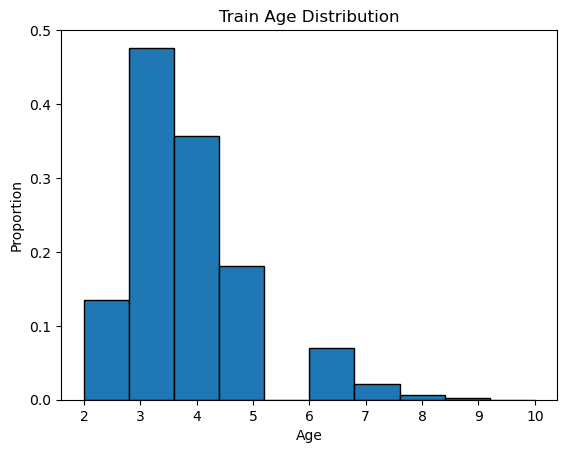

count    40354.000000
mean         3.737820
std          1.178767
min          2.000000
25%          3.000000
50%          4.000000
75%          4.000000
max         10.000000
Name: age, dtype: float64


In [54]:
print(train_df.age.dtype)

# Plot histogram for a given column, e.g., 'value'
plt.hist(train_df['age'], edgecolor='black', density=True)

# Add titles and labels
plt.title('Train Age Distribution')
plt.xlabel('Age')
plt.ylabel('Proportion')

# Show the plot
plt.show()
print(train_df.age.describe())


int64


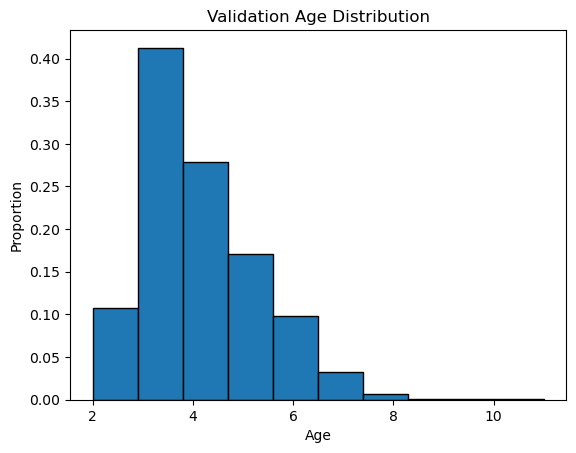

count    14651.000000
mean         3.891543
std          1.303779
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         11.000000
Name: age, dtype: float64


In [55]:
print(valid_df.age.dtype)

# Plot histogram for a given column, e.g., 'value'
plt.hist(valid_df['age'], edgecolor='black', density=True)

# Add titles and labels
plt.title('Validation Age Distribution')
plt.xlabel('Age')
plt.ylabel('Proportion')

# Show the plot
plt.show()
print(valid_df.age.describe())

# Columns to ignore


float64


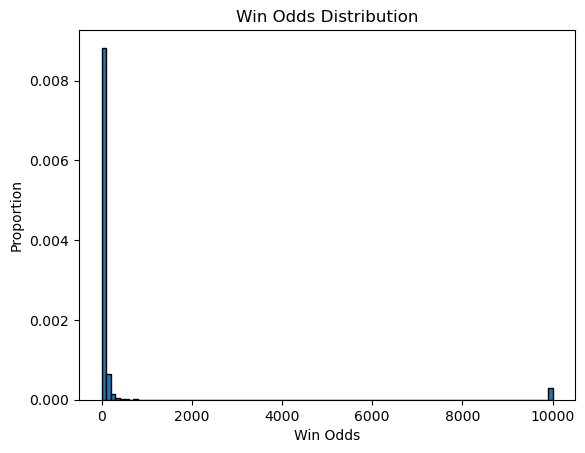

In [56]:
print(df.winOdds.dtype)
# Plot histogram for a given column, e.g., 'value'
plt.hist(df['winOdds'], bins=100, edgecolor='black', density=True)

# Add titles and labels
plt.title('Win Odds Distribution')
plt.xlabel('Win Odds')
plt.ylabel('Proportion')

# Show the plot
plt.show()

Plot above shows outlier near 500 region. We consider this as an outlier.

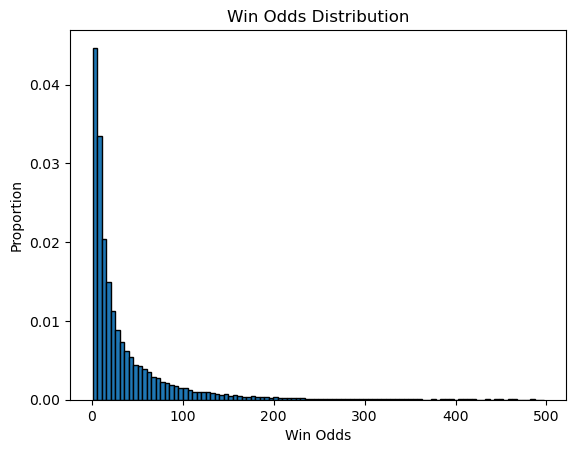

In [57]:
df = df[df['winOdds'] <= 500]
# Plot histogram for a given column, e.g., 'value'
plt.hist(df['winOdds'], bins=100, edgecolor='black', density=True)

# Add titles and labels
plt.title('Win Odds Distribution')
plt.xlabel('Win Odds')
plt.ylabel('Proportion')

# Show the plot
plt.show()

Win Odds is for every horse. 

Instead of feeding the raw value as a feature, we can plot a win odds distribution and feed the p-value of the cdf of the exponential distribution.

Reason
- Raw value has very large scale. The absolute numbers may not mean anything. To help ML model converge faster, we feed meaningful, range bounded value. p-value has range [0.0, 1.0].

In [58]:
from scipy.stats import expon, norm
import numpy as np

class Preprocessing:
    def __init__(self):
        self.win_odd_loc = 0.0
        self.win_odd_scale = 0.0

        self.plc_odd_loc = 0.0
        self.plc_odd_scale = 0.0

        self.wgDf_mu = 0.0
        self.wgDf_scale = 0.0
    
    def fit(self, df):
        params = expon.fit(df["winOdds"])
        self.win_odd_loc, self.win_odd_scale = params

        params = expon.fit(df["plcOdds"])
        self.plc_odd_loc, self.plc_odd_scale = params

        log_weight_diff = np.log(df["wgHr"]) - np.log(df["wgHr"] + df["wgDf"])

        self.wgDf_mu = np.mean(log_weight_diff)
        self.wgDf_scale = np.std(log_weight_diff, ddof=1)

    def forward(self, df):
        df['winOdds'] = 1-expon.cdf(df['winOdds'], loc=self.win_odd_loc, scale=self.win_odd_scale)
        df['plcOdds'] = 1-expon.cdf(df['plcOdds'], loc=self.plc_odd_loc, scale=self.plc_odd_scale)
        log_weight_diff = np.log(df["wgHr"]) - np.log(df["wgHr"] + df["wgDf"])
        df['wgDf'] = (log_weight_diff - self.wgDf_mu) / self.wgDf_scale
        return df

preprocessing = Preprocessing()


In [59]:
preprocessing.fit(train_df)
train_df = preprocessing.forward(train_df)
valid_df = preprocessing.forward(valid_df)

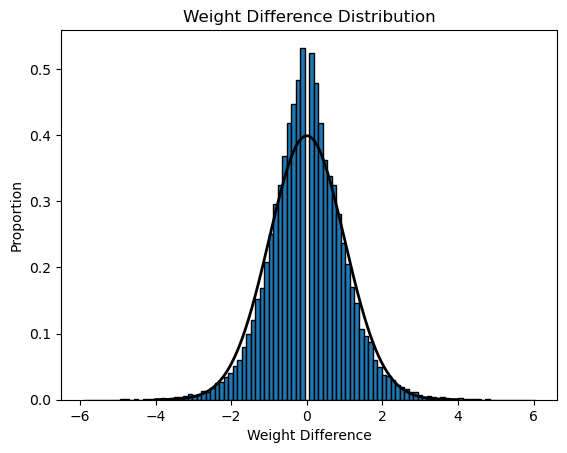

In [60]:
plt.hist(train_df['wgDf'], bins=100, edgecolor='black', density=True)

# Create a range of values for plotting the PDF
xmin, xmax = plt.xlim()
x = np.linspace(-4, 4, 1000)

# Plot the fitted normal distribution
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
plt.title('Weight Difference Distribution')
plt.xlabel('Weight Difference')
plt.ylabel('Proportion')

# Show the plot
plt.show()

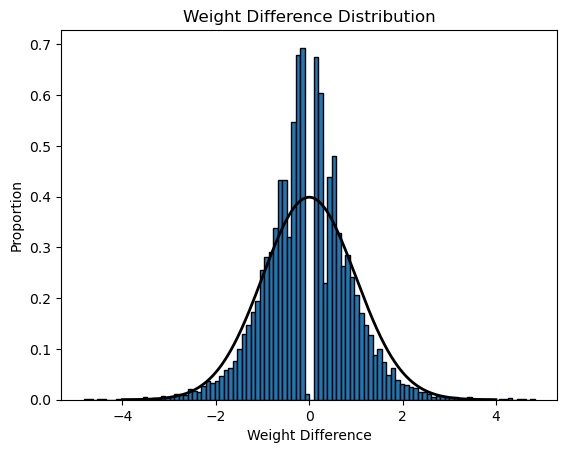

In [61]:
plt.hist(valid_df['wgDf'], bins=100, edgecolor='black', density=True)
# Create a range of values for plotting the PDF
xmin, xmax = plt.xlim()
x = np.linspace(-4, 4, 1000)

# Plot the fitted normal distribution
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
plt.title('Weight Difference Distribution')
plt.xlabel('Weight Difference')
plt.ylabel('Proportion')

# Show the plot
plt.show()

In [62]:
print(train_df[train_df['diffUnit']=="85"]['rcDate'])
print(train_df[train_df['diffUnit']=="85"]['rcNo'])

21166    2021-03-21
Name: rcDate, dtype: object
21166    2
Name: rcNo, dtype: object
